# Slicing pandas objects
Slicing is getting a piece of matrix. There is a lot of ways to slice pandas object, so steel yourself.  
The good part is that they are quite similar and that there is a couple of best methods and usually you don't need others (though you can encounter them in others code).  
Finally you will find methods for filtering dataframe columns and index.

In [42]:
import numpy as np
import pandas as pd
from IPython.display import Image
# Restricting number of displaying rows, just for convenience
pd.set_option('max_rows', 8)

## Slicing Series
Slicing of series is very similar to slicing python list. You just specify start, stop and step arguments in slicing operator (they are treated as in python lists - start is included while stop excluded).  
Slices of Series are Series itself.

In [21]:
# Load data
films = pd.read_csv('data/movie.csv')
films.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# Our series object
duration = films['duration']

In [5]:
# Slice from 2nd to 10th value
duration[1:10]

1    169.0
2    148.0
3    164.0
4      NaN
5    132.0
6    156.0
7    100.0
8    141.0
9    153.0
Name: duration, dtype: float64

In [43]:
# All values up to 5th or from 4907th
print(duration[:5])
duration[4907:]

0    178.0
1    169.0
2    148.0
3    164.0
4      NaN
Name: duration, dtype: float64


4907     80.0
4908     81.0
4909     84.0
4910     95.0
        ...  
4912     43.0
4913     76.0
4914    100.0
4915     90.0
Name: duration, Length: 9, dtype: float64

In [14]:
# Empty series
duration[:0]

Series([], Name: duration, dtype: float64)

In [44]:
# Also we can specify step
print(duration[:20:4])
duration[20::-4]

0     178.0
4       NaN
8     141.0
12    106.0
16    150.0
Name: duration, dtype: float64


20    164.0
16    150.0
12    106.0
8     141.0
4       NaN
0     178.0
Name: duration, dtype: float64

When you have string labeled index you can provide strings for labels

In [22]:
films.set_index('movie_title', inplace=True)
word_index = films['duration']
word_index.head()

movie_title
Avatar                                        178.0
Pirates of the Caribbean: At World's End      169.0
Spectre                                       148.0
The Dark Knight Rises                         164.0
Star Wars: Episode VII - The Force Awakens      NaN
Name: duration, dtype: float64

In [25]:
word_index[:'The Dark Knight Rises']

movie_title
Avatar                                      178.0
Pirates of the Caribbean: At World's End    169.0
Spectre                                     148.0
The Dark Knight Rises                       164.0
Name: duration, dtype: float64

## Slicing DataFrame

### Basic way

Suppose you want to pick several columns from original dataframe. It can be easily done with such construction - `df[list_of_columns]`  
When you slice dataframe you can get series or dataframe back:  
* indexing with 1 passed name of column (not list with column name) return Series  
* indexing with passing list of column names return DataFrame

In [45]:
# Illustration - here we pass 2 columns in list
films[['director_name', 'genres']]

,director_name,genres
movie_title,,
Avatar,James Cameron,Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End,Gore Verbinski,Action|Adventure|Fantasy
Spectre,Sam Mendes,Action|Adventure|Thriller
The Dark Knight Rises,Christopher Nolan,Action|Thriller
...,...,...
The Following,NaN,Crime|Drama|Mystery|Thriller
A Plague So Pleasant,Benjamin Roberds,Drama|Horror|Thriller
Shanghai Calling,Daniel Hsia,Comedy|Drama|Romance
My Date with Drew,Jon Gunn,Documentary


In [46]:
# Result is a Series
films['genres']

movie_title
Avatar                                      Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End           Action|Adventure|Fantasy
Spectre                                           Action|Adventure|Thriller
The Dark Knight Rises                                       Action|Thriller
                                                         ...               
The Following                                  Crime|Drama|Mystery|Thriller
A Plague So Pleasant                                  Drama|Horror|Thriller
Shanghai Calling                                       Comedy|Drama|Romance
My Date with Drew                                               Documentary
Name: genres, Length: 4916, dtype: object

In [47]:
# Result is a DataFrame
films[['genres']]

,genres
movie_title,
Avatar,Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
Spectre,Action|Adventure|Thriller
The Dark Knight Rises,Action|Thriller
...,...
The Following,Crime|Drama|Mystery|Thriller
A Plague So Pleasant,Drama|Horror|Thriller
Shanghai Calling,Comedy|Drama|Romance
My Date with Drew,Documentary


Also you can select 1 column as an attribute - it is easier to type, confer autocompletement but won't work on all column names - it should be distinct from dataframe methods and be written according to python variable notation (without spaces etc)

In [171]:
films.budget

movie_title
Avatar                                      237000000.0
Pirates of the Caribbean: At World's End    300000000.0
Spectre                                     245000000.0
The Dark Knight Rises                       250000000.0
                                               ...     
The Following                                       NaN
A Plague So Pleasant                             1400.0
Shanghai Calling                                    NaN
My Date with Drew                                1100.0
Name: budget, Length: 4916, dtype: float64

To slice some rows from df you can provide numbers for `start`, `stop` and `step` in slicing operator like in list

In [137]:
# Take rows from 2nd to 10th with step equal to 2
films[2:10:2]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


And of course you can use boolean indexing with passing an array, series or dataframe with booleans to slicing operator

In [149]:
# Create a boolean Series with True in positions where film was created by Christopher Nolan
# And index appropriate rows from dataframe with this series
nolan = films['director_name'] == 'Christopher Nolan'
films[nolan]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Dark Knight,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000
Inception,Color,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,292568851.0,Action|Adventure|Sci-Fi|Thriller,...,2803.0,English,USA,PG-13,160000000.0,2010.0,27000.0,8.8,2.35,175000
Batman Begins,Color,Christopher Nolan,478.0,128.0,22000.0,11000.0,Liam Neeson,23000.0,205343774.0,Action|Adventure,...,2685.0,English,USA,PG-13,150000000.0,2005.0,14000.0,8.3,2.35,15000
Insomnia,Color,Christopher Nolan,185.0,118.0,22000.0,319.0,Maura Tierney,14000.0,67263182.0,Drama|Mystery|Thriller,...,651.0,English,USA,R,46000000.0,2002.0,509.0,7.2,2.35,0
The Prestige,Color,Christopher Nolan,341.0,130.0,22000.0,19000.0,Hugh Jackman,23000.0,53082743.0,Drama|Mystery|Sci-Fi|Thriller,...,1100.0,English,USA,PG-13,40000000.0,2006.0,20000.0,8.5,2.35,49000
Memento,Black and White,Christopher Nolan,274.0,113.0,22000.0,379.0,Thomas Lennon,716.0,25530884.0,Mystery|Thriller,...,2067.0,English,USA,R,9000000.0,2000.0,651.0,8.5,2.35,40000


### Better way for label and position slicing
According to [official documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) these methods are the most consistent and less prone to errors than previous, so generally they are preferred.  
In both `loc` and `iloc` methods you passed rows at 1st position and columns at 2nd. You can specify just rows or columns in methods and step if you pass slice.

#### loc
`loc` provides label based slicing - you specify labels of rows (index) and columns (names) which you want to obtain. There are several acceptable values:
* single name - to take 1 row/column
* colon-separated slice from one name to other - to take all rows/columns from the first to other **inclusively**
* list of names - to take all rows/columns from list
* list of booleans of course - to take all rows/columns with `True` in corresponding position
* callable - function taking sliced object and returning something previous in list

In [180]:
# Take all rows from Spectre to he Following with columns from duration to budget
films.loc['Spectre':'The Following', 'duration':'budget']

,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget
movie_title,,,,,,,,,,,,,,,,,,,
Spectre,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0
The Dark Knight Rises,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0
Star Wars: Episode VII - The Force Awakens,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN
John Carter,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Mongol King,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,36,93,Sara Stepnicka,0.0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.0,English,USA,PG-13,3250.0
Newlyweds,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0
Signed Sealed Delivered,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN
The Following,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN


In [176]:
# Select just 1 column or 1 row
films.loc[:, 'genres']

# Same as films.loc['Avatar', :] 
films.loc['Avatar']

color                             Color
director_name             James Cameron
num_critic_for_reviews              723
duration                            178
                              ...      
actor_2_facebook_likes              936
imdb_score                          7.9
aspect_ratio                       1.78
movie_facebook_likes              33000
Name: Avatar, Length: 27, dtype: object

#### iloc
`iloc` provides position based slicing - you specify positions of rows (index) and columns (names) which you want to obtain. There are several acceptable values:
* single number - to take 1 row/column
* colon-separated slice from one number to another - to take all rows/columns from the first inclusively up to other **exclusively** (like normal python list indexing)
* list of numbers - to take all rows/columns from list
* list of booleans of course - to take all rows/columns with `True` in corresponding position
* callable - function taking sliced object and returning something previous in list

In [182]:
# Takes all rows from 2nd up to 3rd from end and columns from 3rd up to 5th from end
films.iloc[2:-3, 3:-5]

,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget
movie_title,,,,,,,,,,,,,,,,,,,
Spectre,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0
The Dark Knight Rises,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0
Star Wars: Episode VII - The Force Awakens,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN
John Carter,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Mongol King,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,36,93,Sara Stepnicka,0.0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.0,English,USA,PG-13,3250.0
Newlyweds,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0
Signed Sealed Delivered,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN
The Following,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN


### Filtering

We can filter columns by some condtions e.g. its dtype.

In [58]:
# Information about column types
print(films.get_dtype_counts())
films.dtypes

float64    13
int64       3
object     11
dtype: int64


color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
                           ...   
actor_2_facebook_likes    float64
imdb_score                float64
aspect_ratio              float64
movie_facebook_likes        int64
Length: 27, dtype: object

In [62]:
# Select appropriate types
films.select_dtypes(include=['int'])

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
...,...,...,...
The Following,73839,1753,32000
A Plague So Pleasant,38,0,16
Shanghai Calling,1255,2386,660
My Date with Drew,4285,163,456


In [61]:
# Or exclude unwanted
films.select_dtypes(exclude=['float', 'object'])

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,
Avatar,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Following,43.0,43.0,NaN,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,32000
A Plague So Pleasant,13.0,76.0,0.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,16
Shanghai Calling,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,660
My Date with Drew,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,1100.0,2004.0,23.0,6.6,1.85,456


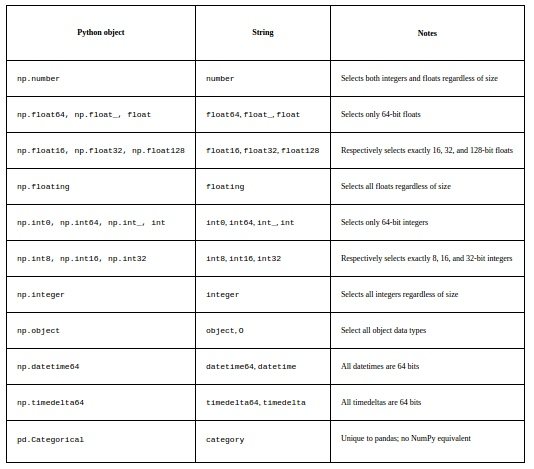

In [126]:
# Table with appropriate types for select_dtypes - you can pass python object or string denoted it
Image('https://pp.userapi.com/c846018/v846018360/7a8a6/kRk051s_h2Y.jpg')

Meanwhile you can `filter` columns or index by parts of their names and even regex patterns  
This method has following mutually exclusive parameters that is you should use only 1 of them:
* `items` - exact labels of columns or rows
* `like` - string which is contained in labels
* `regex` - re pattern to search

And there is one optional argument `axis` to filter index or columns, columns by default

In [101]:
# Find all columns which contain 'actor' in label
films.filter(like='actor')

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
movie_title,,,,,,
Avatar,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
Pirates of the Caribbean: At World's End,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
Spectre,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
The Dark Knight Rises,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
...,...,...,...,...,...,...
The Following,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
A Plague So Pleasant,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
Shanghai Calling,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0
My Date with Drew,16.0,Brian Herzlinger,86.0,John August,Jon Gunn,23.0


In [98]:
# Get all rows where 1 of items is equal to index label
films.filter(items=['Spectre', 'Rampage'], axis=0)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
Rampage,Color,Uwe Boll,58.0,80.0,892.0,492.0,Katharine Isabelle,986.0,NaN,Action|Crime|Thriller,...,129.0,English,Canada,R,NaN,2009.0,918.0,6.3,2.35,0


Also these lines are equivalent except the fact that 1st way doesn't throw a KeyError if items contain absent in DataFrame elements  
`films.filter(items=['duration', 'dilation'], axis=1)`  
`films[['duration', 'dilation']]`

In [121]:
# Whether DataFrames are equal. Note that there is no column 'dilation' in dataframe
pd.DataFrame.equals(films[['duration']], films.filter(items=['duration', 'dilation'], axis=1))

True

In [105]:
# Get rows which contains 2 consecutive digits in a title (index)
films.filter(regex=r'\d{2}', axis=0)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
2012,Color,Roland Emmerich,367.0,158.0,776.0,310.0,Liam James,1000.0,166112167.0,Action|Adventure|Sci-Fi,...,1055.0,English,USA,PG-13,200000000.0,2009.0,468.0,5.8,2.35,13000
47 Ronin,Color,Carl Rinsch,218.0,128.0,47.0,982.0,Cary-Hiroyuki Tagawa,18000.0,38297305.0,Action|Adventure|Drama|Fantasy,...,324.0,English,USA,PG-13,175000000.0,2013.0,1000.0,6.3,2.35,35000
The 13th Warrior,Color,John McTiernan,85.0,102.0,323.0,241.0,Vladimir Kulich,845.0,32694788.0,Action|Adventure|History,...,546.0,English,USA,R,85000000.0,1999.0,372.0,6.6,2.35,0
300: Rise of an Empire,Color,Noam Murro,366.0,102.0,263.0,1000.0,Sullivan Stapleton,6000.0,106369117.0,Action|Drama|Fantasy|War,...,523.0,English,USA,R,110000000.0,2014.0,1000.0,6.2,2.35,71000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Locker 13,Color,Bruce Dellis,10.0,95.0,0.0,309.0,Ricky Schroder,685.0,2468.0,Thriller,...,5.0,English,USA,R,300000.0,2014.0,665.0,4.8,1.85,261
"The Beast from 20,000 Fathoms",Black and White,Eugène Lourié,67.0,80.0,7.0,21.0,Cecil Kellaway,57.0,5000000.0,Adventure|Horror|Sci-Fi,...,88.0,English,USA,Approved,210000.0,1953.0,40.0,6.7,1.37,465
Antarctic Edge: 70° South,Color,Dena Seidel,5.0,72.0,0.0,0.0,Hugh Ducklow,0.0,4914.0,Adventure|Documentary,...,2.0,English,USA,NaN,150000.0,2015.0,0.0,7.0,NaN,215
20 Dates,Color,Myles Berkowitz,32.0,87.0,0.0,153.0,Tom Ardavany,1000.0,536767.0,Biography|Comedy|Romance,...,83.0,English,USA,R,60000.0,1998.0,184.0,5.3,1.85,30
